In [29]:
from google.cloud import vision
from pdf2image import convert_from_path
from PIL import Image, ImageDraw
import io
import fitz  # PyMuPDF
import os
import requests

In [ ]:
client = vision.ImageAnnotatorClient()

In [1]:
import fitz  # PyMuPDF

def get_image_metadata_from_pdf(pdf_path):
    """
    Extracts metadata of images embedded in each page of a scanned PDF,
    including page dimensions in points and inches, and calculates DPI if missing.
    """
    doc = fitz.open(pdf_path)
    image_metadata = []
    
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        
        # Get page dimensions in points and inches
        page_width_pts, page_height_pts = page.rect.width, page.rect.height
        page_width_in = page_width_pts / 72  # Convert points to inches
        page_height_in = page_height_pts / 72
        
        # Extract the list of images on this page
        images = page.get_images(full=True)  # 'full=True' gets all images on page
        
        for img_index, img in enumerate(images):
            xref = img[0]  # Image reference number
            base_image = doc.extract_image(xref)
            
            # Retrieve metadata about the image
            width_px, height_px = base_image["width"], base_image["height"]
            dpi_x, dpi_y = base_image.get("dpi", (None, None))
            
            # Calculate DPI if not provided
            if dpi_x is None or dpi_y is None:
                dpi_x = width_px / page_width_in
                dpi_y = height_px / page_height_in
            
            # Append metadata, including page dimensions and calculated DPI
            image_metadata.append({
                "page": page_num + 1,
                "image_index": img_index + 1,
                "width_px": width_px,
                "height_px": height_px,
                "format": base_image["ext"],
                "dpi_x": dpi_x,
                "dpi_y": dpi_y,
                "page_width_pts": page_width_pts,
                "page_height_pts": page_height_pts,
                "page_width_in": page_width_in,
                "page_height_in": page_height_in,
            })
    
    doc.close()
    return image_metadata

In [2]:
pdf_path = '../books/TEST-phat-giao-viet-nam-1956-05-06.pdf'

In [3]:
get_image_metadata_from_pdf(pdf_path)

[{'page': 1,
  'image_index': 1,
  'width_px': 1024,
  'height_px': 1536,
  'format': 'jpeg',
  'dpi_x': 95.51817752805862,
  'dpi_y': 95.50646677386379,
  'page_width_pts': 771.8740234375,
  'page_height_pts': 1157.9530029296875,
  'page_width_in': 10.720472547743055,
  'page_height_in': 16.08268059624566},
 {'page': 2,
  'image_index': 1,
  'width_px': 1024,
  'height_px': 1536,
  'format': 'jpeg',
  'dpi_x': 95.51817752805862,
  'dpi_y': 95.50646677386379,
  'page_width_pts': 771.8740234375,
  'page_height_pts': 1157.9530029296875,
  'page_width_in': 10.720472547743055,
  'page_height_in': 16.08268059624566}]

In [21]:
# Load PDF and extract image bytes from a given page
doc = fitz.open(pdf_path)
page = doc.load_page(0)  # Load the first page
images = page.get_images(full=True)
xref = images[0][0]  # Get the first image reference

base_image = doc.extract_image(xref)
image_bytes = base_image["image"]  # Get the raw JPEG byte content

In [23]:
# Convert to PIL Image for further processing if needed
pil_image = Image.open(io.BytesIO(image_bytes))


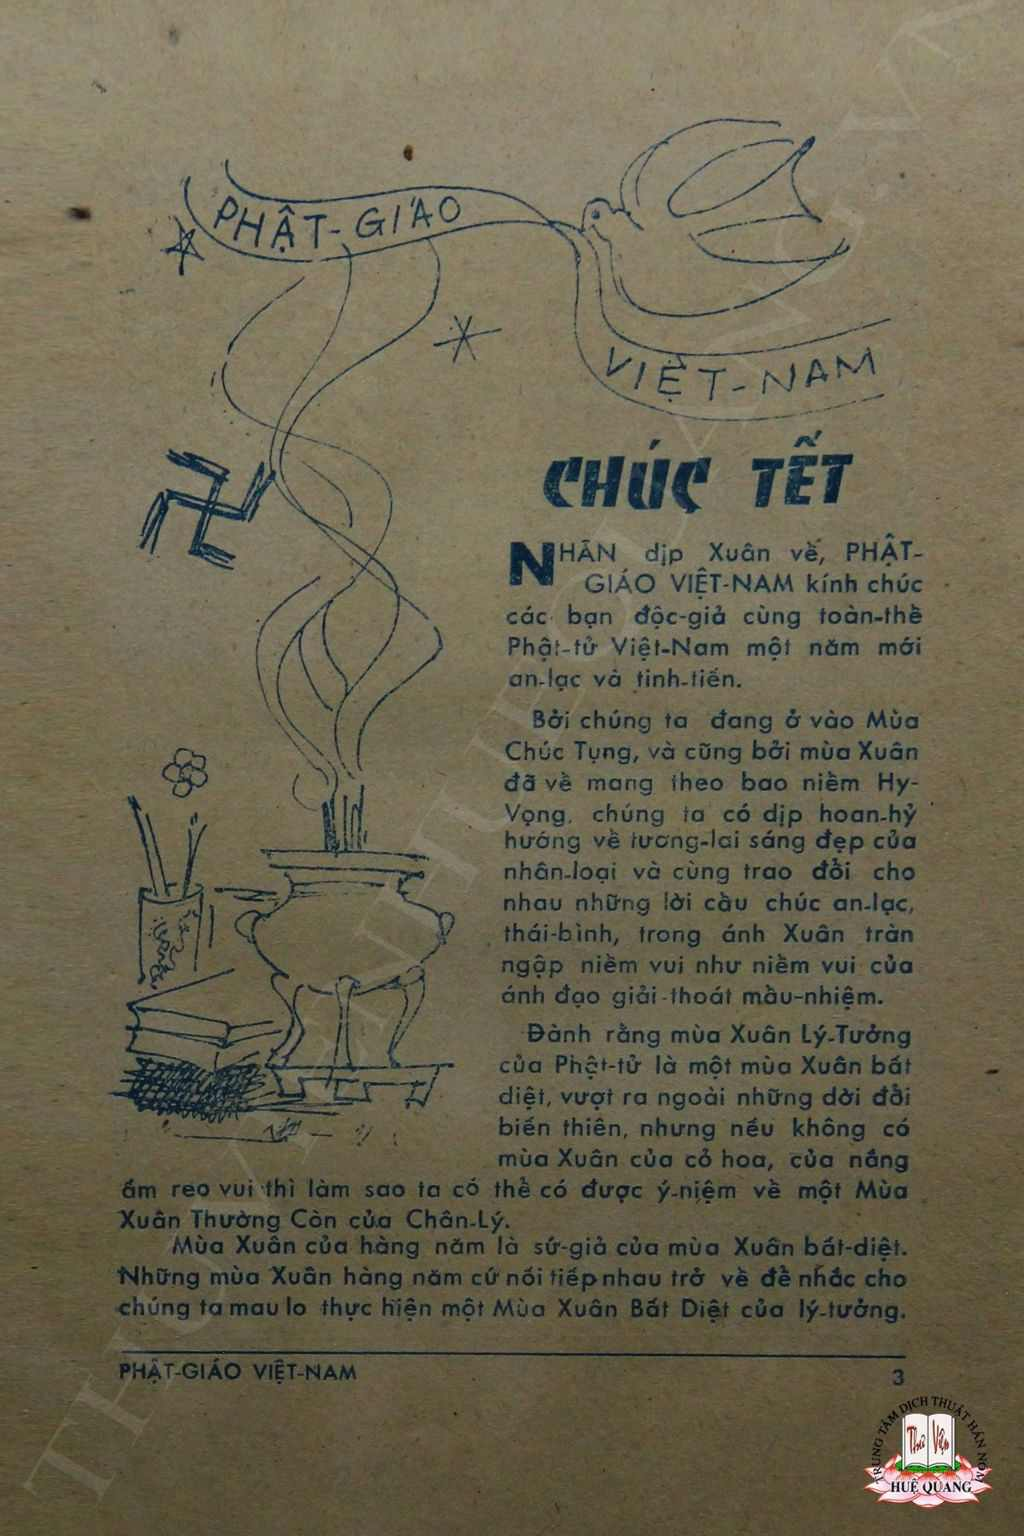

In [24]:
pil_image

In [ ]:
#annotate with vision
image = vision.Image(content=image_bytes)
response = client.text_detection(image=image)

In [19]:
text = response.text_annotations

In [20]:
print(text[0].description)

MỘT
PHẬT GIAO
卍
*
VIỆT NAM
CHÚC TẾT
NHÂN, dịp Xuân về, PHẬT
GIÁO VIỆT NAM kính chúc
các bạn độc giả cùng toàn thề
Phật-tử Việt-Nam một năm mới
an lạc và tinh tiến.
Bởi chúng ta đang ở vào Mùa
Chúc Tụng, và cũng bởi mùa Xuân
đã về mang theo bao niềm Hy-
Vọng, chúng ta có dịp hoan hỷ
hướng về tương lai sáng đẹp của
nhân loại và cùng trao đổi cho
nhau những lời cầu chúc an lạc,
thái bình, trong ảnh Xuân tràn
ngập niềm vui như niềm vui của
ảnh đạo giải thoát màu-nhiệm.
Đành rằng mùa Xuân Lý Tưởng
của Phật-tử là một mùa Xuân bất
diệt, vượt ra ngoài những dời đổi
biến thiên, nhưng nếu không có
mùa Xuân của cỏ hoa, của nắng
ẩm reo vui thì làm sao ta có thể có được ý niệm về một Mùa
Xuân Thường Còn của Chân Lý.
Mùa Xuân của hàng năm là sứ giả của mùa Xuân bất-diệt.
Những mùa Xuân hàng năm cứ nối tiếp nhau trở về đề nhắc cho
chúng ta mau lo thực hiện một Mùa Xuân Bất Diệt của lý tưởng.
PHẬT GIÁO VIỆT NAM
TH
3
TAMAN
HUỆ QUANG


In [71]:
draw = ImageDraw.Draw(test_image)

In [25]:
# scape website for .pdfs

import requests
from bs4 import BeautifulSoup
import re

# Target URL
url = "https://thuvienhoasen.org/a26248/tap-chi-phat-giao-viet-nam"

# Request page content
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Find all links ending with .pdf
pdf_links = []
for link in soup.find_all("a", href=True):
    if link["href"].endswith(".pdf"):
        pdf_links.append(link["href"])

# Display results
for pdf_link in pdf_links:
    print(pdf_link)

/images/file/EX2jDwPv0wgQALde/phat-giao-viet-nam-1956-01.pdf
/images/file/CJVcGQPv0wgQAAUU/phat-giao-viet-nam-1956-02.pdf
/images/file/IZi9agPv0wgQACN7/phat-giao-viet-nam-1956-03.pdf
/images/file/W4_oggPv0wgQAK9N/phat-giao-viet-nam-1956-04.pdf
/images/file/F3pv7wPv0wgQABZr/phat-giao-viet-nam-1956-05-06.pdf
/images/file/Ifv5XwTv0wgQAA0Q/phat-giao-viet-nam-1956-07.pdf
http://thuvienhoasen.org/images/file/AV2Jzwzv0wgQAPxT/phat-giao-viet-nam-1956-09-10.pdf
/images/file/sDLTewXv0wgQAI1S/phat-giao-viet-nam-1956-12.pdf
http://thuvienhoasen.org/images/file/C_Snmgzv0wgQAAwG/phat-giao-viet-nam-1956-11.pdf
/images/file/sDLTewXv0wgQAI1S/phat-giao-viet-nam-1956-12.pdf
http://thuvienhoasen.org/images/file/5c7eogzv0wgQAP1E/phat-giao-viet-nam-1956-13.pdf
/images/file/D0hBuQXv0wgQAAcG/phat-giao-viet-nam-1956-14.pdf
/images/file/m-Bh8gXv0wgQAExW/phat-giao-viet-nam-1956-15.pdf
/images/file/D9l9cwbv0wgQAFhB/phat-giao-viet-nam-1956-16.pdf
/images/file/4Vp0iwbv0wgQAJAY/phat-giao-viet-nam-1956-17-18.pdf
http

In [28]:
# Specify the directory where PDFs will be saved
pdf_download_directory = "../PDF/Phat_Giao_journals"  # Update this path to your desired directory
os.makedirs(pdf_download_directory, exist_ok=True)

In [31]:
# download all pdf:
# Base URL for constructing full PDF URLs
base_url = "https://thuvienhoasen.org"

# Download each PDF in pdf_links
for pdf_link in pdf_links:
    # Construct the full URL for each PDF link
    pdf_url = base_url + pdf_link if pdf_link.startswith('/') else pdf_link
    pdf_name = os.path.basename(pdf_url)
    pdf_path = os.path.join(pdf_download_directory, pdf_name)
    
    # Download the PDF file
    pdf_response = requests.get(pdf_url, stream=True)
    with open(pdf_path, "wb") as pdf_file:
        for chunk in pdf_response.iter_content(chunk_size=1024):
            pdf_file.write(chunk)
    
    print(f"Downloaded {pdf_name} to {pdf_path}")

Downloaded phat-giao-viet-nam-1956-01.pdf to ../PDF/Phat_Giao_journals/phat-giao-viet-nam-1956-01.pdf
Downloaded phat-giao-viet-nam-1956-02.pdf to ../PDF/Phat_Giao_journals/phat-giao-viet-nam-1956-02.pdf
Downloaded phat-giao-viet-nam-1956-03.pdf to ../PDF/Phat_Giao_journals/phat-giao-viet-nam-1956-03.pdf
Downloaded phat-giao-viet-nam-1956-04.pdf to ../PDF/Phat_Giao_journals/phat-giao-viet-nam-1956-04.pdf
Downloaded phat-giao-viet-nam-1956-05-06.pdf to ../PDF/Phat_Giao_journals/phat-giao-viet-nam-1956-05-06.pdf
Downloaded phat-giao-viet-nam-1956-07.pdf to ../PDF/Phat_Giao_journals/phat-giao-viet-nam-1956-07.pdf
Downloaded phat-giao-viet-nam-1956-09-10.pdf to ../PDF/Phat_Giao_journals/phat-giao-viet-nam-1956-09-10.pdf
Downloaded phat-giao-viet-nam-1956-12.pdf to ../PDF/Phat_Giao_journals/phat-giao-viet-nam-1956-12.pdf
Downloaded phat-giao-viet-nam-1956-11.pdf to ../PDF/Phat_Giao_journals/phat-giao-viet-nam-1956-11.pdf
Downloaded phat-giao-viet-nam-1956-12.pdf to ../PDF/Phat_Giao_journals